In [0]:
!git clone https://njnitesh@bitbucket.org/njnitesh/traffic_sign_classifier_data.git

Cloning into 'traffic_sign_classifier_data'...
remote: Counting objects: 8, done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 1), reused 0 (delta 0)
Unpacking objects: 100% (8/8), done.


In [0]:
!ls traffic_sign_classifier_data

signnames.csv  test.p  train.p	valid.p


In [0]:
baseDir="/content/traffic_sign_classifier_data"

In [0]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv



from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random


Using TensorFlow backend.


In [0]:


#loadding the files

with open(baseDir+"/train.p","rb") as f:
  train=pickle.loads(f.read())
  
with open(baseDir+"/test.p","rb") as f:
  test=pickle.loads(f.read())
  
with open(baseDir+"/valid.p","rb") as f:
  valid=pickle.loads(f.read())
  
  
info=pd.read_csv(baseDir+"/signnames.csv")



In [0]:
features=train['features']
labels=train['labels']



val_features=valid['features']
val_labels=valid['labels']

In [0]:
val_labels.shape

(4410,)

In [0]:
info.tail()

,ClassId,SignName
38,38,Keep right
39,39,Keep left
40,40,Roundabout mandatory
41,41,End of no passing
42,42,End of no passing by vechiles over 3.5 metric ...


41

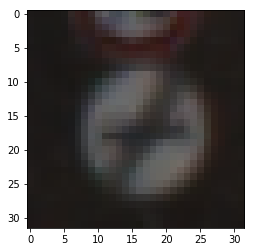

In [0]:
plt.imshow(features[0])
labels[0]

In [0]:
d=pd.Series(labels).value_counts()

lab=d.index
val=d.values

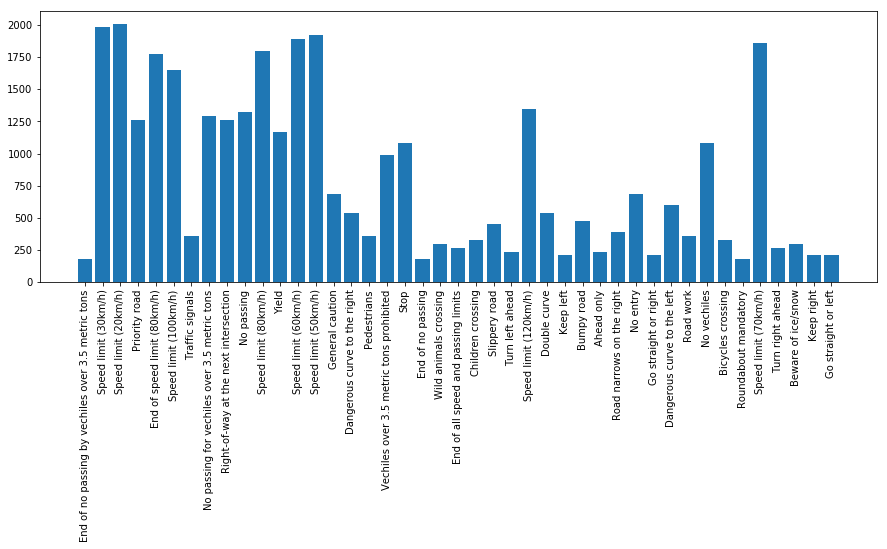

In [0]:
plt.figure(figsize=(15,5))
plt.xticks(d.index,info.SignName.values,rotation=90)
plt.bar(lab,val)
plt.show()

In [0]:
def preProcessingOfImages(image):
  gray=cv.cvtColor(image,cv.COLOR_RGB2GRAY)
  hist=cv.equalizeHist(gray)
  return hist/255

In [0]:
# plt.imshow(preProcessingOfImages(features[90]))



convertedImages=np.array(list(map(preProcessingOfImages,features)))


val_convertedImages=np.array(list(map(preProcessingOfImages,val_features)))

In [0]:
convertedImages.shape

(34799, 32, 32)

In [0]:
finalConImages=convertedImages.reshape(-1,32,32,1)
val_finalConImages=val_convertedImages.reshape(-1,32,32,1)

In [0]:
val_finalConImages.shape

(4410, 32, 32, 1)

In [0]:
finalLabels=to_categorical(labels,43)
val_finalLables=to_categorical(val_labels,43)

In [0]:
val_finalLables.shape

(4410, 43)

In [0]:
# we are ready to feed the data



#defination of model

def lenet_model():
    model=Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(32,32,1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(10, (3,3), activation="relu"))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(600, activation="relu"))
    model.add(Dropout(0.7))
    model.add(Dense(43, activation="softmax"))
    model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"] )
    return model  

In [0]:
model=lenet_model()
model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 10)        2710      
_________________________________________________________________
dropout_33 (Dropout)         (None, 12, 12, 10)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 6, 6, 10)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 360)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 600)               216600    
__________

/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:110: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


In [0]:
model.fit(finalConImages,
         finalLabels,
         epochs=30,
         batch_size=400,
         validation_data=(val_finalConImages,val_finalLables),
         verbose=1,
         shuffle=1)

# epochs=30, validation_data=(nx_val, y_val), shuffle=1, verbose=1, batch_size=400

Train on 34799 samples, validate on 4410 samples
Epoch 1/30
34799/34799 [==============================] - 3s 73us/step - loss: 2.8295 - acc: 0.2503 - val_loss: 1.8901 - val_acc: 0.5653
Epoch 2/30
34799/34799 [==============================] - 1s 25us/step - loss: 1.2920 - acc: 0.6059 - val_loss: 1.0553 - val_acc: 0.7680
Epoch 3/30
34799/34799 [==============================] - 1s 25us/step - loss: 0.8838 - acc: 0.7236 - val_loss: 0.7589 - val_acc: 0.8410
Epoch 4/30
34799/34799 [==============================] - 1s 24us/step - loss: 0.7027 - acc: 0.7754 - val_loss: 0.6176 - val_acc: 0.8540
Epoch 5/30
34799/34799 [==============================] - 1s 25us/step - loss: 0.5964 - acc: 0.8094 - val_loss: 0.5325 - val_acc: 0.8810
Epoch 6/30
34799/34799 [==============================] - 1s 24us/step - loss: 0.5261 - acc: 0.8324 - val_loss: 0.4984 - val_acc: 0.8850
Epoch 7/30
34799/34799 [==============================] - 1s 25us/step - loss: 0.4750 - acc: 0.8466 - val_loss: 0.4470 - val_acc:

In [0]:
from PIL import Image
import io
import requests
import cv2 as cv
import numpy as np

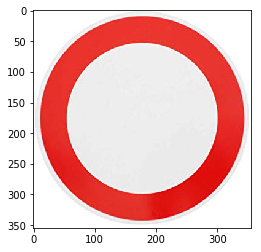

In [0]:
#url="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQcBl12ofxjXLr6GjSO0WZZxBoqW9mecJ2W0OZ2iQIQrbOjQf1I"
#url="https://i.ebayimg.com/images/g/tGwAAOSwU8hY4Uxx/s-l300.png"
# url="https://www.hirstsigns.co.uk/content/images/thumbs/0000057_30-mph-speed-limit-sign_550.jpeg"
# url="https://previews.123rf.com/images/ronnarid/ronnarid1504/ronnarid150400004/38968290-stop-sign-no-entry-sign-vector.jpg"
# url="https://images-na.ssl-images-amazon.com/images/I/418F%2BoO8XPL._SY450_.jpg"
# url="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwVVXB7Lwnrnl1gIiTLeHoXYOMwD6mxm3T0f5_k8PiEr7y-oDD"
# url="https://image.shutterstock.com/display_pic_with_logo/2535709/460275505/stock-vector-uk-road-bump-sign-460275505.jpg"
url="https://images-na.ssl-images-amazon.com/images/I/61cVpDj6wnL._SY355_.jpg"
img=np.array(Image.open(io.BytesIO(requests.get(url,stream=True).content)).convert("RGB"))
plt.imshow(img)

In [0]:
img=preProcessingOfImages(img)

In [0]:
img=cv.resize(img,(32,32))
img=img.reshape(1,32,32,1)

In [0]:
img.shape

(1, 32, 32, 1)

In [0]:
op=model.model.predict_classes(img)

info[info.ClassId==op[0]]

/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:110: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


,ClassId,SignName
15,15,No vechiles
